In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Atlanta Police Department ![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

In [2]:
### Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

Load data (don't change this if you're running the notebook on the cluster)

We have two files
- `/home/data/APD/COBRA083016_2015.xlsx` for 2015
- `/home/data/APD/COBRA083016.xlsx` from 2009 to current date

In [3]:
%%time
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')

CPU times: user 12.6 s, sys: 21.5 ms, total: 12.7 s
Wall time: 39.6 s


In [5]:
df.shape

(30011, 23)

In [6]:
for c in df.columns:
    print(c)

MI_PRINX
offense_id
rpt_date
occur_date
occur_time
poss_date
poss_time
beat
apt_office_prefix
apt_office_num
location
MinOfucr
MinOfibr_code
dispo_code
MaxOfnum_victims
Shift
Avg Day
loc_type
UC2 Literal
neighborhood
npu
x
y


In [33]:
df.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,loc_type,UC2 Literal,neighborhood,npu,x,y,Zone,occur_ts,occur_month,occur_woy
206914,1371687,150562000,05/14/2013,05/14/2013,09:00:00,05/14/2013,11:30:00,205,NaN,NaN,...,18.0,LARCENY-FROM VEHICLE,Woodfield,C,-84.40912,33.82308,2,2013-05-14 09:00:00,5.0,20.0
207443,4346442,150010052,01/01/2015,12/31/2014,22:00:00,01/01/2015,00:07:00,512,NaN,NaN,...,NaN,LARCENY-FROM VEHICLE,Downtown,M,-84.39361,33.75246,5,2014-12-31 22:00:00,12.0,1.0
207444,4346443,150010079,01/01/2015,01/01/2015,00:03:00,01/01/2015,00:03:00,606,NaN,3377,...,26.0,ROBBERY-PEDESTRIAN,Grant Park,W,-84.35917,33.73991,6,2015-01-01 00:03:00,1.0,1.0
207445,4346444,150010151,01/01/2015,12/31/2014,23:45:00,01/01/2015,00:21:00,208,NaN,NaN,...,18.0,LARCENY-NON VEHICLE,Buckhead Forest,B,-84.37462,33.84564,2,2014-12-31 23:45:00,12.0,1.0
207446,4346445,150010214,01/01/2015,01/01/2015,00:30:00,01/01/2015,01:05:00,407,1000,1009,...,26.0,AGG ASSAULT,Fairburn Mays,H,-84.50968,33.74349,4,2015-01-01 00:30:00,1.0,1.0


In [6]:
df.describe()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,13.000000,-84.432445,33.729060
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,18.000000,-84.398210,33.756000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,21.000000,-84.374420,33.781470
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250


In [7]:
df.offense_id.min(), df.offense_id.max()

(150010052, 153658045)

In [11]:
df.columns

Index([u'MI_PRINX', u'offense_id', u'rpt_date', u'occur_date', u'occur_time',
       u'poss_date', u'poss_time', u'beat', u'apt_office_prefix',
       u'apt_office_num', u'location', u'MinOfucr', u'MinOfibr_code',
       u'dispo_code', u'MaxOfnum_victims', u'Shift', u'Avg Day', u'loc_type',
       u'UC2 Literal', u'neighborhood', u'npu', u'x', u'y'],
      dtype='object')

In [8]:
crime_summary = df.groupby(['UC2 Literal', 'neighborhood']).offense_id.count()

In [13]:
crime_summary.index

MultiIndex(levels=[[u'AGG ASSAULT', u'AUTO THEFT', u'BURGLARY-NONRES', u'BURGLARY-RESIDENCE', u'LARCENY-FROM VEHICLE', u'LARCENY-NON VEHICLE', u'RAPE', u'ROBBERY-COMMERCIAL', u'ROBBERY-PEDESTRIAN', u'ROBBERY-RESIDENCE'], [u'Adair Park', u'Adams Park', u'Adamsville', u'Almond Park', u'Amal Heights', u'Ansley Park', u'Arden/Habersham', u'Ardmore', u'Argonne Forest', u'Arlington Estates', u'Ashley Courts', u'Ashview Heights', u'Atkins Park', u'Atlanta Industrial Park', u'Atlanta University Center', u'Atlantic Station', u'Audobon Forest', u'Audobon Forest West', u'Baker Hills', u'Bakers Ferry', u'Bankhead', u'Bankhead Courts', u'Bankhead/Bolton', u'Beecher Hills', u'Ben Hill', u'Ben Hill Acres', u'Ben Hill Forest', u'Ben Hill Pines', u'Ben Hill Terrace', u'Benteen Park', u'Berkeley Park', u'Betmar LaVilla', u'Blair Villa/Poole Creek', u'Blandtown', u'Bolton', u'Bolton Hills', u'Boulder Park', u'Boulevard Heights', u'Brandon', u'Brentwood', u'Briar Glen', u'Brookhaven', u'Brookview Heights'

In [10]:
crime_summary.reset_index().head(20)

,UC2 Literal,neighborhood,offense_id
0,AGG ASSAULT,Adair Park,23
1,AGG ASSAULT,Adams Park,13
2,AGG ASSAULT,Adamsville,22
3,AGG ASSAULT,Almond Park,8
4,AGG ASSAULT,Argonne Forest,1
5,AGG ASSAULT,Arlington Estates,6
6,AGG ASSAULT,Ashley Courts,2
7,AGG ASSAULT,Ashview Heights,15
8,AGG ASSAULT,Atlanta University Center,21
9,AGG ASSAULT,Atlantic Station,7


In [15]:
df["Zone"] = df.beat // 100

In [16]:
df

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,Zone
206914,1371687,150562000,05/14/2013,05/14/2013,09:00:00,05/14/2013,11:30:00,205,NaN,NaN,...,1,Day,Tue,18.0,LARCENY-FROM VEHICLE,Woodfield,C,-84.40912,33.82308,2
207443,4346442,150010052,01/01/2015,12/31/2014,22:00:00,01/01/2015,00:07:00,512,NaN,NaN,...,1,Morn,Wed,NaN,LARCENY-FROM VEHICLE,Downtown,M,-84.39361,33.75246,5
207444,4346443,150010079,01/01/2015,01/01/2015,00:03:00,01/01/2015,00:03:00,606,NaN,3377,...,1,Morn,Thu,26.0,ROBBERY-PEDESTRIAN,Grant Park,W,-84.35917,33.73991,6
207445,4346444,150010151,01/01/2015,12/31/2014,23:45:00,01/01/2015,00:21:00,208,NaN,NaN,...,1,Morn,Thu,18.0,LARCENY-NON VEHICLE,Buckhead Forest,B,-84.37462,33.84564,2
207446,4346445,150010214,01/01/2015,01/01/2015,00:30:00,01/01/2015,01:05:00,407,1000,1009,...,2,Morn,Thu,26.0,AGG ASSAULT,Fairburn Mays,H,-84.50968,33.74349,4
207447,4346446,150010359,01/01/2015,12/31/2014,21:00:00,01/01/2015,00:15:00,512,NaN,NaN,...,1,Eve,Wed,18.0,AUTO THEFT,Downtown,M,-84.39303,33.75094,5
207448,4346447,150010370,01/01/2015,12/31/2014,23:15:00,01/01/2015,01:47:00,505,NaN,NaN,...,1,Morn,Thu,13.0,LARCENY-FROM VEHICLE,Midtown,E,-84.38882,33.77511,5
207449,4346448,150010413,01/01/2015,12/31/2014,23:00:00,01/01/2015,02:00:00,303,NaN,NaN,...,3,Morn,Thu,13.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39903,33.73631,3
207450,4346449,150010417,01/01/2015,01/01/2015,02:00:00,01/01/2015,02:03:00,304,NaN,NaN,...,1,Morn,Thu,14.0,LARCENY-NON VEHICLE,Summerhill,V,-84.38686,33.74229,3
207451,4346450,150010419,01/01/2015,01/01/2015,01:50:00,01/01/2015,02:00:00,403,NaN,A,...,1,Morn,Thu,20.0,AGG ASSAULT,Oakland City,S,-84.42831,33.71759,4


## Exploring Dates

In [11]:
df[['offense_id', 'occur_date', 'occur_time', 'rpt_date']][1:10]

,offense_id,occur_date,occur_time,rpt_date
207443,150010052,12/31/2014,22:00:00,01/01/2015
207444,150010079,01/01/2015,00:03:00,01/01/2015
207445,150010151,12/31/2014,23:45:00,01/01/2015
207446,150010214,01/01/2015,00:30:00,01/01/2015
207447,150010359,12/31/2014,21:00:00,01/01/2015
207448,150010370,12/31/2014,23:15:00,01/01/2015
207449,150010413,12/31/2014,23:00:00,01/01/2015
207450,150010417,01/01/2015,02:00:00,01/01/2015
207451,150010419,01/01/2015,01:50:00,01/01/2015


Convert into date-time type

In [12]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [19]:
#df[['offense_id', 'occur_date', 'occur_time', 'occur_ts', 'rpt_date']][1:10]

In [20]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [21]:
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

In [22]:
df.describe()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y,Zone,occur_month,occur_woy
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000,30011.000000,29997.000000,29997.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058,3.527307,6.654399,27.453312
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981,1.700308,3.365509,14.700785
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450,1.000000,1.000000,1.000000
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,13.000000,-84.432445,33.729060,2.000000,4.000000,15.000000
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,18.000000,-84.398210,33.756000,4.000000,7.000000,28.000000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,21.000000,-84.374420,33.781470,5.000000,10.000000,40.000000
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250,7.000000,12.000000,53.000000


In [23]:
df.shape

(30011, 27)

In [24]:
df.columns

Index([         u'MI_PRINX',        u'offense_id',          u'rpt_date',
              u'occur_date',        u'occur_time',         u'poss_date',
               u'poss_time',              u'beat', u'apt_office_prefix',
          u'apt_office_num',          u'location',          u'MinOfucr',
           u'MinOfibr_code',        u'dispo_code',  u'MaxOfnum_victims',
                   u'Shift',           u'Avg Day',          u'loc_type',
             u'UC2 Literal',      u'neighborhood',               u'npu',
                       u'x',                 u'y',              u'Zone',
                u'occur_ts',       u'occur_month',         u'occur_woy'],
      dtype='object')

In [13]:
df.iloc[9]

MI_PRINX                            4346450
offense_id                        150010419
rpt_date                         01/01/2015
occur_date                       01/01/2015
occur_time                         01:50:00
poss_date                        01/01/2015
poss_time                          02:00:00
beat                                    403
apt_office_prefix                       NaN
apt_office_num                            A
location             1231 CAMPBELLTON PL SW
MinOfucr                                430
MinOfibr_code                          1315
dispo_code                               10
MaxOfnum_victims                          1
Shift                                  Morn
Avg Day                                 Thu
loc_type                                 20
UC2 Literal                     AGG ASSAULT
neighborhood                   Oakland City
npu                                       S
x                                  -84.4283
y                               

In [27]:
#resdf.index

In [28]:
resdf.loc[['AUTO_THEFT', 6]]

NameError: name 'resdf' is not defined

In [16]:
resdf = df.groupby(['UC2 Literal', 'occur_date']).offense_id.count()
resdf

UC2 Literal        occur_date
AGG ASSAULT        01/01/2009    1
                   01/01/2015    6
                   01/02/2015    6
                   01/03/2015    7
                   01/04/2015    4
                   01/05/2015    3
                   01/06/2015    4
                   01/07/2015    6
                   01/08/2015    5
                   01/09/2015    7
                   01/10/2015    3
                   01/11/2015    9
                   01/12/2015    3
                   01/13/2015    1
                   01/14/2015    7
                   01/15/2015    2
                   01/16/2015    3
                   01/17/2015    3
                   01/18/2015    7
                   01/19/2015    9
                   01/20/2015    5
                   01/21/2015    2
                   01/22/2015    6
                   01/23/2015    3
                   01/24/2015    3
                   01/25/2015    3
                   01/26/2015    8
                   01/27/

In [17]:
resdf['BURGLARY-RESIDENCE'].as_matrix()

array([13,  1,  6, 12,  7,  9, 12,  6,  1, 11, 10,  1, 10,  7, 17, 16, 10,
       18, 15, 18, 10,  7, 16,  1,  8, 10,  9, 11, 11, 16,  8, 15, 16, 10,
        9, 11, 14,  4, 13,  9,  8, 13,  8,  3,  6, 10, 10, 16,  5,  2,  6,
        3,  3,  7, 10,  4,  8, 13,  9,  5,  7, 13, 13, 12,  9,  6, 12, 12,
       13,  5,  8,  9,  7,  9,  9, 14,  6,  8, 15,  9, 12,  7, 13,  8,  5,
       10, 16, 15,  9,  6, 13,  3, 14,  9, 17, 15, 17, 12,  4, 18,  9, 14,
        9, 15,  5, 11, 11, 13, 11,  7,  8,  6,  6, 16, 11,  9,  8,  6, 10,
        3,  7, 13,  8, 12, 12,  8,  9, 11, 17,  7, 17, 15,  8,  4,  9, 23,
        1, 20, 12, 10,  1,  7,  6, 21, 11, 12,  1, 12, 14, 13,  6,  5, 18,
       18, 15, 13, 13,  6, 11, 14, 13,  8, 15, 10,  6, 11,  6,  4,  7,  7,
       12,  5,  8, 10, 14, 15, 12, 12,  9, 11, 17, 11, 17, 22,  9,  6, 10,
       11, 10, 19, 14, 11,  2, 13, 10,  4, 11, 16,  9,  6, 12, 16,  9, 14,
       13,  8,  6, 11,  5, 13,  6,  7,  9,  8, 19,  9, 10,  7, 10,  9,  3,
        9,  9, 12,  4, 12

In [19]:
resdf['BURGLARY-RESIDENCE'].iloc(0)

In [22]:
resdf['BURGLARY-RESIDENCE']

occur_date
01/01/2015    13
01/02/2014     1
01/02/2015     6
01/03/2015    12
01/04/2015     7
01/05/2015     9
01/06/2015    12
01/07/2015     6
01/08/2014     1
01/08/2015    11
01/09/2015    10
01/10/2014     1
01/10/2015    10
01/11/2015     7
01/12/2015    17
01/13/2015    16
01/14/2015    10
01/15/2015    18
01/16/2015    15
01/17/2015    18
01/18/2015    10
01/19/2015     7
01/20/2015    16
01/21/2014     1
01/21/2015     8
01/22/2015    10
01/23/2015     9
01/24/2015    11
01/25/2015    11
01/26/2015    16
              ..
12/13/2015    13
12/14/2015    21
12/15/2014     1
12/15/2015    10
12/16/2014     1
12/16/2015    20
12/17/2015    14
12/18/2014     1
12/18/2015    21
12/19/2015     8
12/20/2014     2
12/20/2015    20
12/21/2015    13
12/22/2014     1
12/22/2015     9
12/23/2014     1
12/23/2015     8
12/24/2014     2
12/24/2015    10
12/25/2015    10
12/26/2014     1
12/26/2015     8
12/27/2015     6
12/28/2015    12
12/29/2014     1
12/29/2015     6
12/30/2014     2
12/

ValueError: First argument must be a sequence

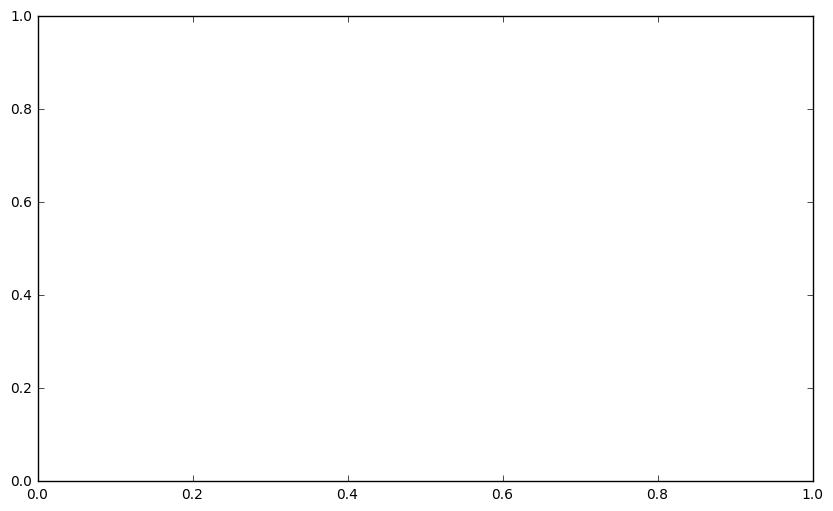

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(10,6)) # 10inx10in
#plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'].values, marker='x')
# plt.scatter(resdf['BURGLARY-NONRES'].index, resdf['BURGLARY-NONRES'], marker='o')

# plt.ylim(0, 500)
# plt.title('BURGLARY-RESIDENCE')
# plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# fig.savefig('BurglaryResidence_over_month.svg')
# x = 1

In [ ]:
def getTheMonth(x):
    return x.month

df['occur_month'] = df['occur_ts'].map(getTheMonth)

In [ ]:
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

In [ ]:
%matplotlib inline
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
fig = plt.figure(figsize=(10,6))
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('quiz3-burglary-residence.png')

''

In [ ]:
plt.savefig('quiz3-burglary-residence.png')


# Part 1 - Observations from the data


In [28]:
pd.unique(df) # how to get duplicate records?

ValueError: cannot copy sequence with size 24 to array axis with dimension 30011

In [29]:
pd.unique(df['UC2 Literal'])

array([u'LARCENY-FROM VEHICLE', u'ROBBERY-PEDESTRIAN',
       u'LARCENY-NON VEHICLE', u'AGG ASSAULT', u'AUTO THEFT',
       u'BURGLARY-RESIDENCE', u'ROBBERY-RESIDENCE', u'BURGLARY-NONRES',
       u'ROBBERY-COMMERCIAL', u'RAPE'], dtype=object)

In [30]:
len(pd.unique(df.MI_PRINX))

30011

# Part 2 - Seasonal Model

In [ ]:
## load complete dataset
dff = pd.read_excel('/home/data/APD/COBRA083016.xlsx', sheetname='Query')

In [ ]:
dff.shape

In [ ]:
for evt in ['occur', 'poss']:
    dff['%s_ts'%evt] = pd.to_datetime(dff['%s_date'%evt]+' '+dff['%s_time'%evt])
dff['rpt_ts'] = pd.to_datetime(dff.rpt_date)

In [ ]:
', '.join(dff.columns)

In [ ]:
dff['occur_year'] = dff.occur_ts.dt.year
dff['occur_month'] = dff.occur_ts.dt.month
dff['occur_dayweek'] = dff.occur_ts.dt.dayofweek

### Crime per year
Let's look at the 

In [ ]:
crime_year = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year']).offense_id.count()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(40,30))
crime_types = crime_year.index.levels[0]
years = crime_year.index.levels[1]
for c in range(len(crime_types)):
    y_max = max(crime_year.loc[crime_types[c]])
    
    plt.subplot(4,3,c+1)
    plt.hlines(crime_year.loc[crime_types[c]].iloc[-1]*100/y_max, years[0], years[-1], linestyles="dashed", color="r")
    plt.bar(crime_year.loc[crime_types[c]].index, crime_year.loc[crime_types[c]]*100/y_max, label=crime_types[c], alpha=0.5)
    ##plt.legend()
    plt.ylim(0, 100)
    plt.xticks(years+0.4, [str(int(y)) for y in years], rotation=0, fontsize=24)
    plt.yticks([0,20,40,60,80,100], ['0%','20%','40%','60%','80%','100%'], fontsize=24)
    plt.title(crime_types[c], fontsize=30)
    None

Let's look at residential burglary.

In [ ]:
c = 3
crime_types[c]

In [ ]:
crime_year_month = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year', 'occur_month']).offense_id.count()

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
resburglaries = crime_year_month.loc[crime_types[c]]
fig = plt.figure(figsize=(20,10))
for y in years:
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s"%crime_types[c], fontsize=20)
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

Normalized over the annual average

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (with annuale averages)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    std = resburglaries.loc[y].std()
    ##plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, (resburglaries.loc[y]-avg)/std, label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (normalized)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
plt.ylabel("Standard deviations $\sigma_y$")
None

In [ ]:
seasonal_adjust = resburglaries.reset_index().groupby(by=['occur_month']).offense_id.agg('mean')

### Fitting the regression line
Suppose there are $n$ data points {{math|{(''x<sub>i</sub>'', ''y<sub>i</sub>''), ''i'' {{=}} 1, ..., ''n''}.}} The function that describes x and y is:

$$y_i = \alpha + \beta x_i + \varepsilon_i.$$

The goal is to find the equation of the straight line

$$y = \alpha + \beta x,$$

which would provide a "best" fit for the data points. Here the "best" will be understood as in the [[Ordinary least squares|least-squares]] approach: a line that minimizes the sum of squared residuals of the linear regression model. In other words, {{mvar|α}} (the {{mvar|y}}-intercept) and {{mvar|β}} (the slope) solve the following minimization problem:

$$\text{Find }\min_{\alpha,\,\beta} Q(\alpha, \beta), \qquad \text{for } Q(\alpha, \beta) = \sum_{i=1}^n\varepsilon_i^{\,2} = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2\ $$

By using either [[calculus]], the geometry of [[inner product space]]s, or simply expanding to get a quadratic expression in {{mvar|α}} and {{mvar|β}}, it can be shown that the values of {{mvar|α}} and {{mvar|β}} that minimize the objective function {{mvar|Q}}<ref>Kenney, J. F. and Keeping, E. S. (1962) "Linear Regression and Correlation." Ch. 15 in ''Mathematics of Statistics'', Pt. 1, 3rd ed. Princeton, NJ: Van Nostrand, pp. 252–285</ref> are

: <math>\begin{align}
  \hat\beta &= \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i - x_i \bar{y} - \bar{x} y_i + \bar{x} \bar{y})} { \sum_{i=1}^n (x_i^2 - 2 x_i \bar{x} + \bar{x}^2) } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i) - \bar{y} \sum_{i=1}^{n}  x_i  - \bar{x} \sum_{i=1}^{n} y_i + n  \bar{x} \bar{y}} { \sum_{i=1}^n (x_i^2) - 2 \bar{x}  \sum_{i=1}^n  x_i  + n \bar{x}^2 } \\[6pt]
            &= \frac{ \frac{1}{n} \sum_{i=1}^{n} x_i y_i - \bar{x} \bar{y} }{ \frac{1}{n}\sum_{i=1}^n {x_i^2} -   \overline{x}^2 } \\[6pt]
            &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } = \frac{ \operatorname{Cov}[x, y] }{ \operatorname{Var}[x] } \\
            &= r_{xy} \frac{s_y}{s_x}, \\[6pt]
 \hat\alpha & = \bar{y} - \hat\beta\,\bar{x},
\end{align}</math>

where {{math|''r<sub>xy</sub>''}} is the [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] between {{mvar|x}} and {{mvar|y}}; and {{math|''s<sub>x</sub>''}} and {{math|''s<sub>y</sub>''}} are the [[sample standard deviation]] of {{mvar|x}} and {{mvar|y}}. A horizontal bar over a quantity indicates the average value of that quantity. For example:

:<math>\overline{xy} = \frac{1}{n} \sum_{i=1}^n x_i y_i.</math>

Substituting the above expressions for <math>\hat{\alpha}</math> and <math>\hat{\beta}</math> into

: <math>f = \hat{\alpha} + \hat{\beta} x,</math>

yields

: <math>\frac{ f - \bar{y}}{s_y} = r_{xy} \frac{ x - \bar{x}}{s_x}  </math>

This shows that {{math|''r<sub>xy</sub>''}} is the slope of the regression line of the [[Standard score|standardized]] data points (and that this line passes through the origin).

It is sometimes useful to calculate {{math|''r<sub>xy</sub>''}} from the data independently using this equation:

:<math>r_{xy} = \frac{ \overline{xy} - \bar{x}\bar{y} }{ \sqrt{ \left(\overline{x^2} - \bar{x}^2\right)\left(\overline{y^2} - \bar{y}^2\right)} } </math>

The [[coefficient of determination]] (R squared) is equal to <math>r_{xy}^2</math> when the model is linear with a single independent variable. See [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] for additional details.

===Linear regression without the intercept term===
Sometimes it is appropriate to force the regression line to pass through the origin, because {{mvar|x}} and {{mvar|y}} are assumed to be proportional. For the model without the intercept term, {{math|''y'' {{=}} ''βx''}}, the OLS estimator for {{mvar|β}} simplifies to

: <math>\hat{\beta} = \frac{ \sum_{i=1}^n x_i y_i }{ \sum_{i=1}^n x_i^2 } = \frac{\overline{x y}}{\overline{x^2}} </math>

Substituting {{math|(''x'' − ''h'', ''y'' − ''k'')}} in place of {{math|(''x'', ''y'')}} gives the regression through {{math|(''h'', ''k'')}}:

: <math>\begin{align}
  \hat\beta &= \frac{\overline{(x - h) (y - k)}}{\overline{(x - h)^2}} \\[6pt]
            &= \frac{\overline{x y} + k \bar{x} - h \bar{y} - h k }{\overline{x^2} - 2 h \bar{x} + h^2} \\[6pt]
            &= \frac{\overline{x y} - \bar{x} \bar{y} + (\bar{x} - h)(\bar{y} - k)}{\overline{x^2} - \bar{x}^2 + (\bar{x} - h)^2} \\[6pt]
            &= \frac{\operatorname{Cov}[x,y] + (\bar{x} - h)(\bar{y}-k)}{\operatorname{Var}[x] + (\bar{x} - h)^2}
\end{align}</math>

The last form above demonstrates how moving the line away from the center of mass of the data points affects the slope.


In [29]:
### in case we want to save a DataFrame
#writer = pd.ExcelWriter('myresults.xlsx')
#df.to_excel(writer,'Results')
#writer.save()

In [30]:
#resdf

NameError: name 'resdf' is not defined